# **IMPORT THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA COLLECTION OR DATA LOADING**

In [172]:
titanic_data = pd.read_csv('/content/train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **DATA PREPROCESSING**

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_data.shape

(891, 12)

In [138]:
# CHECKING MISSING VALUES
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


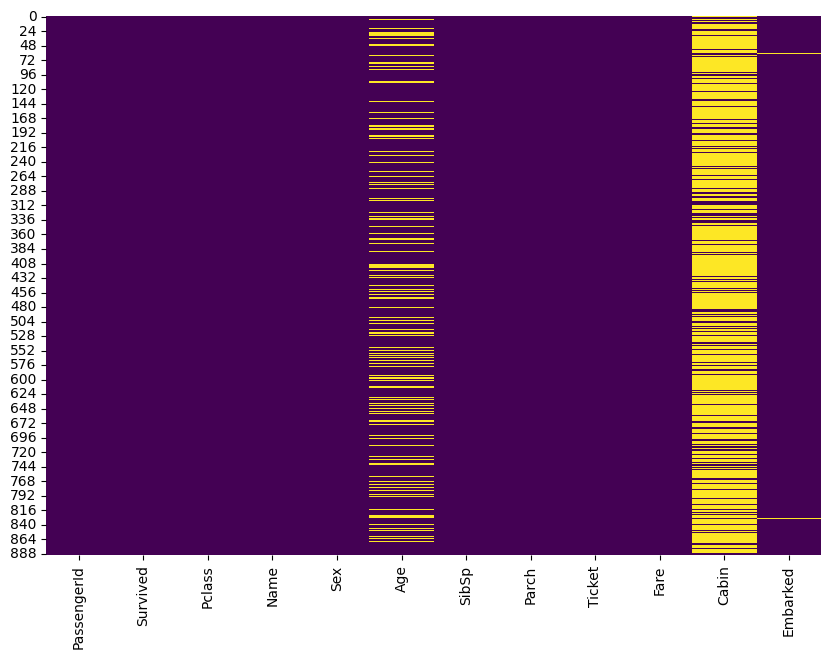

In [7]:
# Visualize missing values using heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.show()

HANDLING MISSING VALUES

In [173]:
# DROPPING THE COLUMN 'CABIN' BECAUSE IT HAS NULL-VALUES MORE THAN 30%
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [174]:
# FILLING THE MISSING VALUES OF AGE BY MEAN
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [175]:
# AND FILLING EMBARKED WITH MODE BECAUSE IT IS CATEGORICAL
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [176]:
# CHECKING MISSING VALUES
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [143]:
# CHECKING DATA TYPES OF COLUMNS
titanic_data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [177]:
# CHNAGING DATA TYPE OF AGE FROM FLOAT TO INTEGER
titanic_data['Age'] = titanic_data['Age'].astype(int)

In [118]:
titanic_data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,int64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [15]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [16]:
# CHECKING DUPLICATES
titanic_data.duplicated().sum()

0

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


# **DATA ANALYSIS**

In [18]:
titanic_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.544332,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.013778,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [178]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [146]:
titanic_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [147]:
# Finding the unique of Survived!
titanic_data['Survived'].unique()

array([0, 1])



*   0 means 'not survied'
*   1 means 'survived'




In [148]:
# Finding the unique of Embarked!
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [179]:
# Finding the number of people survived and not survived
survived_counts = titanic_data['Survived'].value_counts()
survived_counts

,count
Survived,
0,549
1,342


In [180]:
# Finding the number of classes of Embarked
embarked_counts = titanic_data['Embarked'].value_counts()
embarked_counts

,count
Embarked,
S,646
C,168
Q,77


In [181]:
# Finding the number of classes of Gender
gender_count = titanic_data['Sex'].value_counts()
gender_count

,count
Sex,
male,577
female,314


**ENCODING**

In [28]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

**FEATURE ENGINEERING**

In [182]:
# Create Family Size feature
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

In [183]:
# Extract Title from Name
titanic_data['Title'] = titanic_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


In [184]:
titanic_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [122]:
titanic_data['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


The term Mademoiselle is a French familiar title, abbreviated Mlle, traditionally given to an unmarried woman. The equivalent in English is "Miss". However, the courtesy title "Madame" is accorded women where their marital status is unknown.

In [185]:
titanic_data['Title'] = titanic_data['Title'].replace('Mlle', 'Miss')

In France, one traditionally calls a young, unmarried woman Mademoiselle – Mlle for short – and an older, married woman Madame, whose abbreviation is Mme.

In [186]:
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')
titanic_data['Title'] = titanic_data['Title'].replace('Ms', 'Mrs')

In [187]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,Mr


In [188]:
# Drop unnecessary columns
titanic_data.drop(columns=['Name', 'Ticket'], inplace=True)


In [189]:
titanic_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady',
       'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'], dtype=object)

In [190]:
~titanic_data['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])

,Title
0,False
1,False
2,False
3,False
4,False
...,...
886,True
887,False
888,False
889,False


In [191]:
titanic_data.loc[(~titanic_data['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title']

,Title
30,Don
149,Rev
150,Rev
245,Dr
249,Rev
317,Dr
398,Dr
449,Major
536,Major
556,Lady


In [192]:
titanic_data.loc[(~titanic_data['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'

In [193]:
titanic_data[titanic_data['Title']=='Rare Title']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
30,31,0,1,male,40,0,0,27.7208,C,0,Rare Title
149,150,0,2,male,42,0,0,13.0000,S,0,Rare Title
150,151,0,2,male,51,0,0,12.5250,S,0,Rare Title
245,246,0,1,male,44,2,0,90.0000,Q,2,Rare Title
249,250,0,2,male,54,1,0,26.0000,S,1,Rare Title
317,318,0,2,male,54,0,0,14.0000,S,0,Rare Title
398,399,0,2,male,23,0,0,10.5000,S,0,Rare Title
449,450,1,1,male,52,0,0,30.5000,S,0,Rare Title
536,537,0,1,male,45,0,0,26.5500,S,0,Rare Title
556,557,1,1,female,48,1,0,39.6000,C,1,Rare Title


In [194]:
titanic_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

# **DATA VISUALIZATION**

<ipython-input-31-7838c38552f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='viridis')


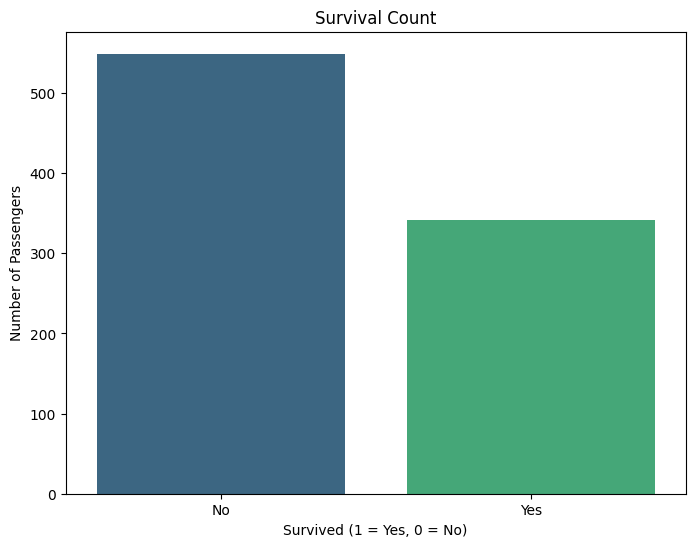

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='viridis')
plt.title('Survival Count')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [51]:
mendata=titanic_data[titanic_data.Sex=='male']
femaledata=titanic_data[titanic_data.Sex=='female']

No of Males: 577
No of Females: 314


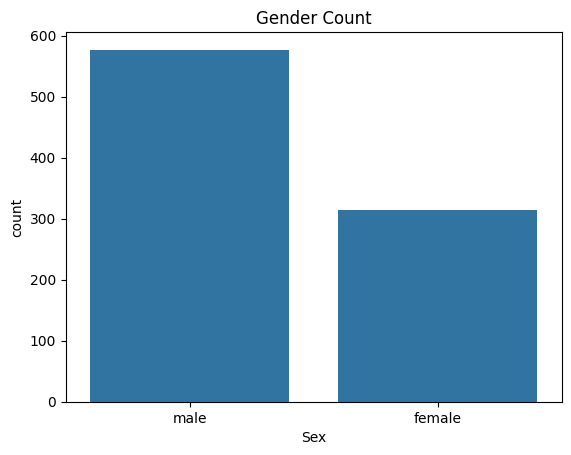

In [53]:
print('No of Males:',str(mendata.count()['Sex']))
print('No of Females:',str(femaledata.count()['Sex']))
sns.countplot(x='Sex', data=titanic_data)
plt.title('Gender Count')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

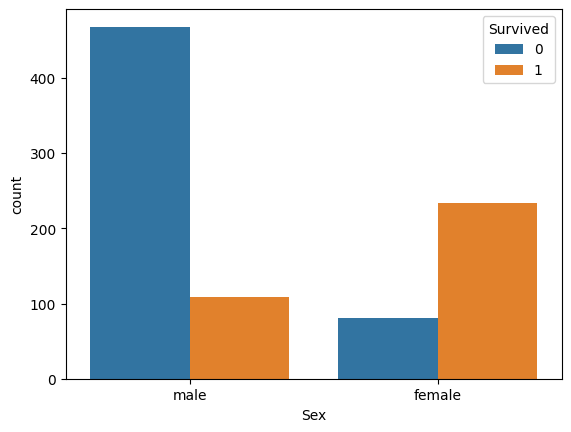

In [54]:
# Number of survivors by Gender wise
sns.countplot(x="Sex", hue="Survived", data=titanic_data)

In [55]:
titanic_data.groupby(['Sex','Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

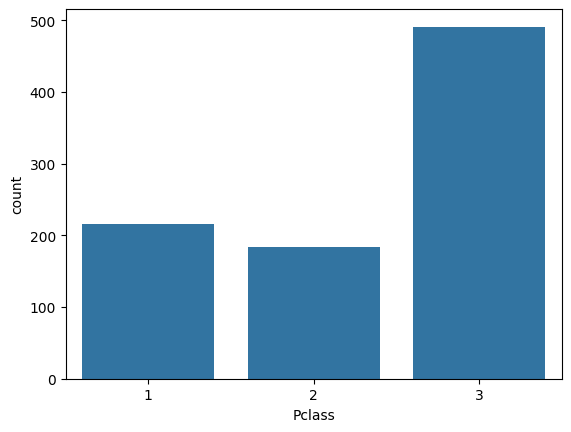

In [56]:
sns.countplot(x='Pclass', data=titanic_data);

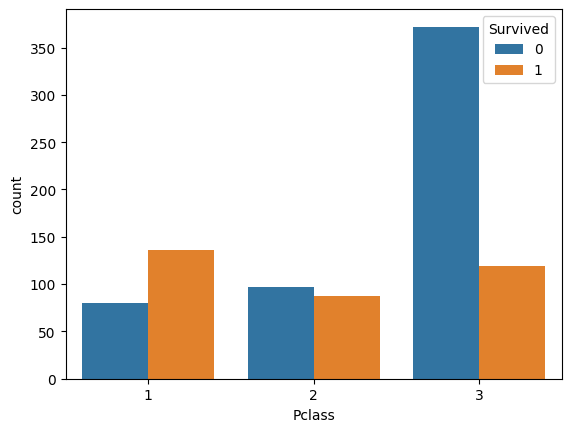

In [57]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data);

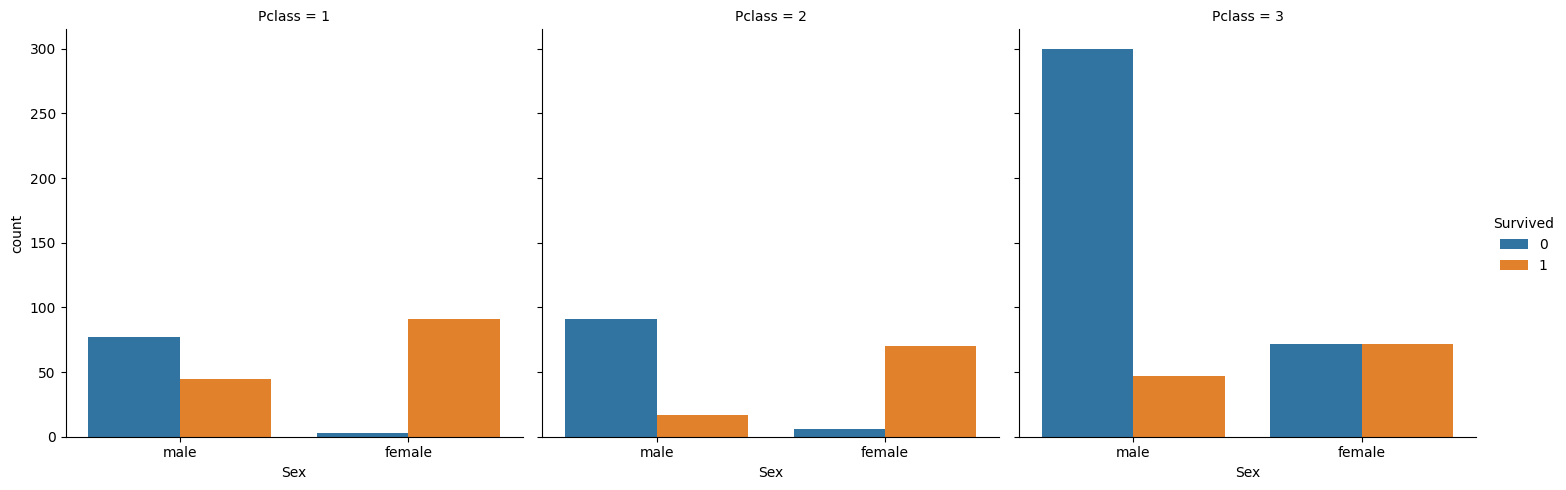

In [58]:
sns.catplot(x='Sex', col='Pclass', hue='Survived', data=titanic_data, kind='count');

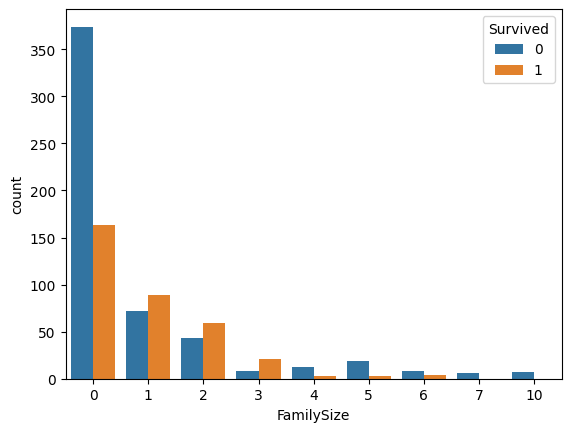

In [86]:
sns.countplot(data=titanic_data,x='FamilySize', hue='Survived');

In [87]:
titanic_data.groupby('FamilySize')['Survived'].value_counts()

FamilySize  Survived
0           0           374
            1           163
1           1            89
            0            72
2           1            59
            0            43
3           1            21
            0             8
4           0            12
            1             3
5           0            19
            1             3
6           0             8
            1             4
7           0             6
10          0             7
Name: count, dtype: int64

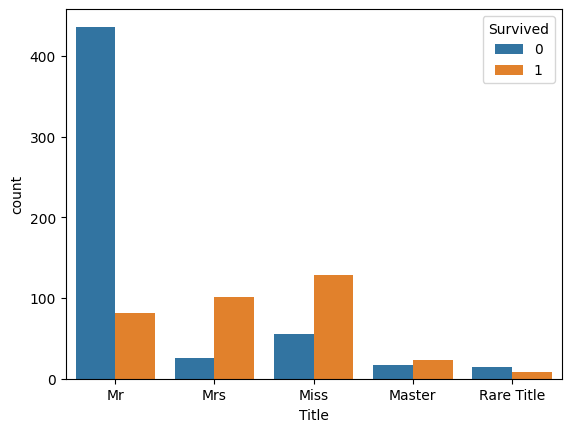

In [84]:
sns.countplot(data=titanic_data,x='Title', hue='Survived');

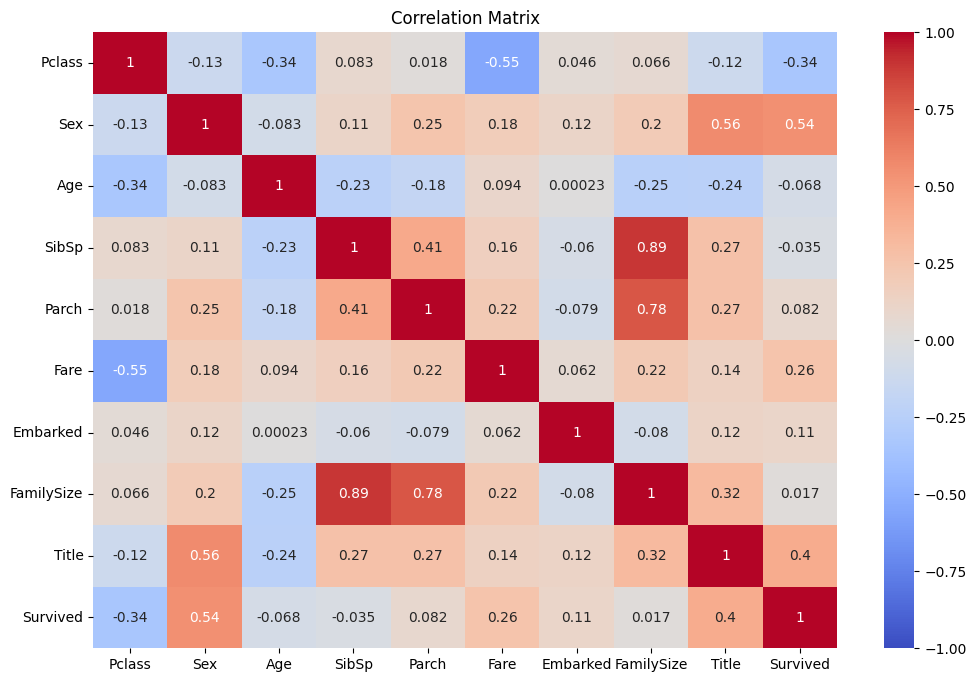

In [201]:
# Correlation Matrix after Encoding
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title']
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_data[features + ['Survived']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



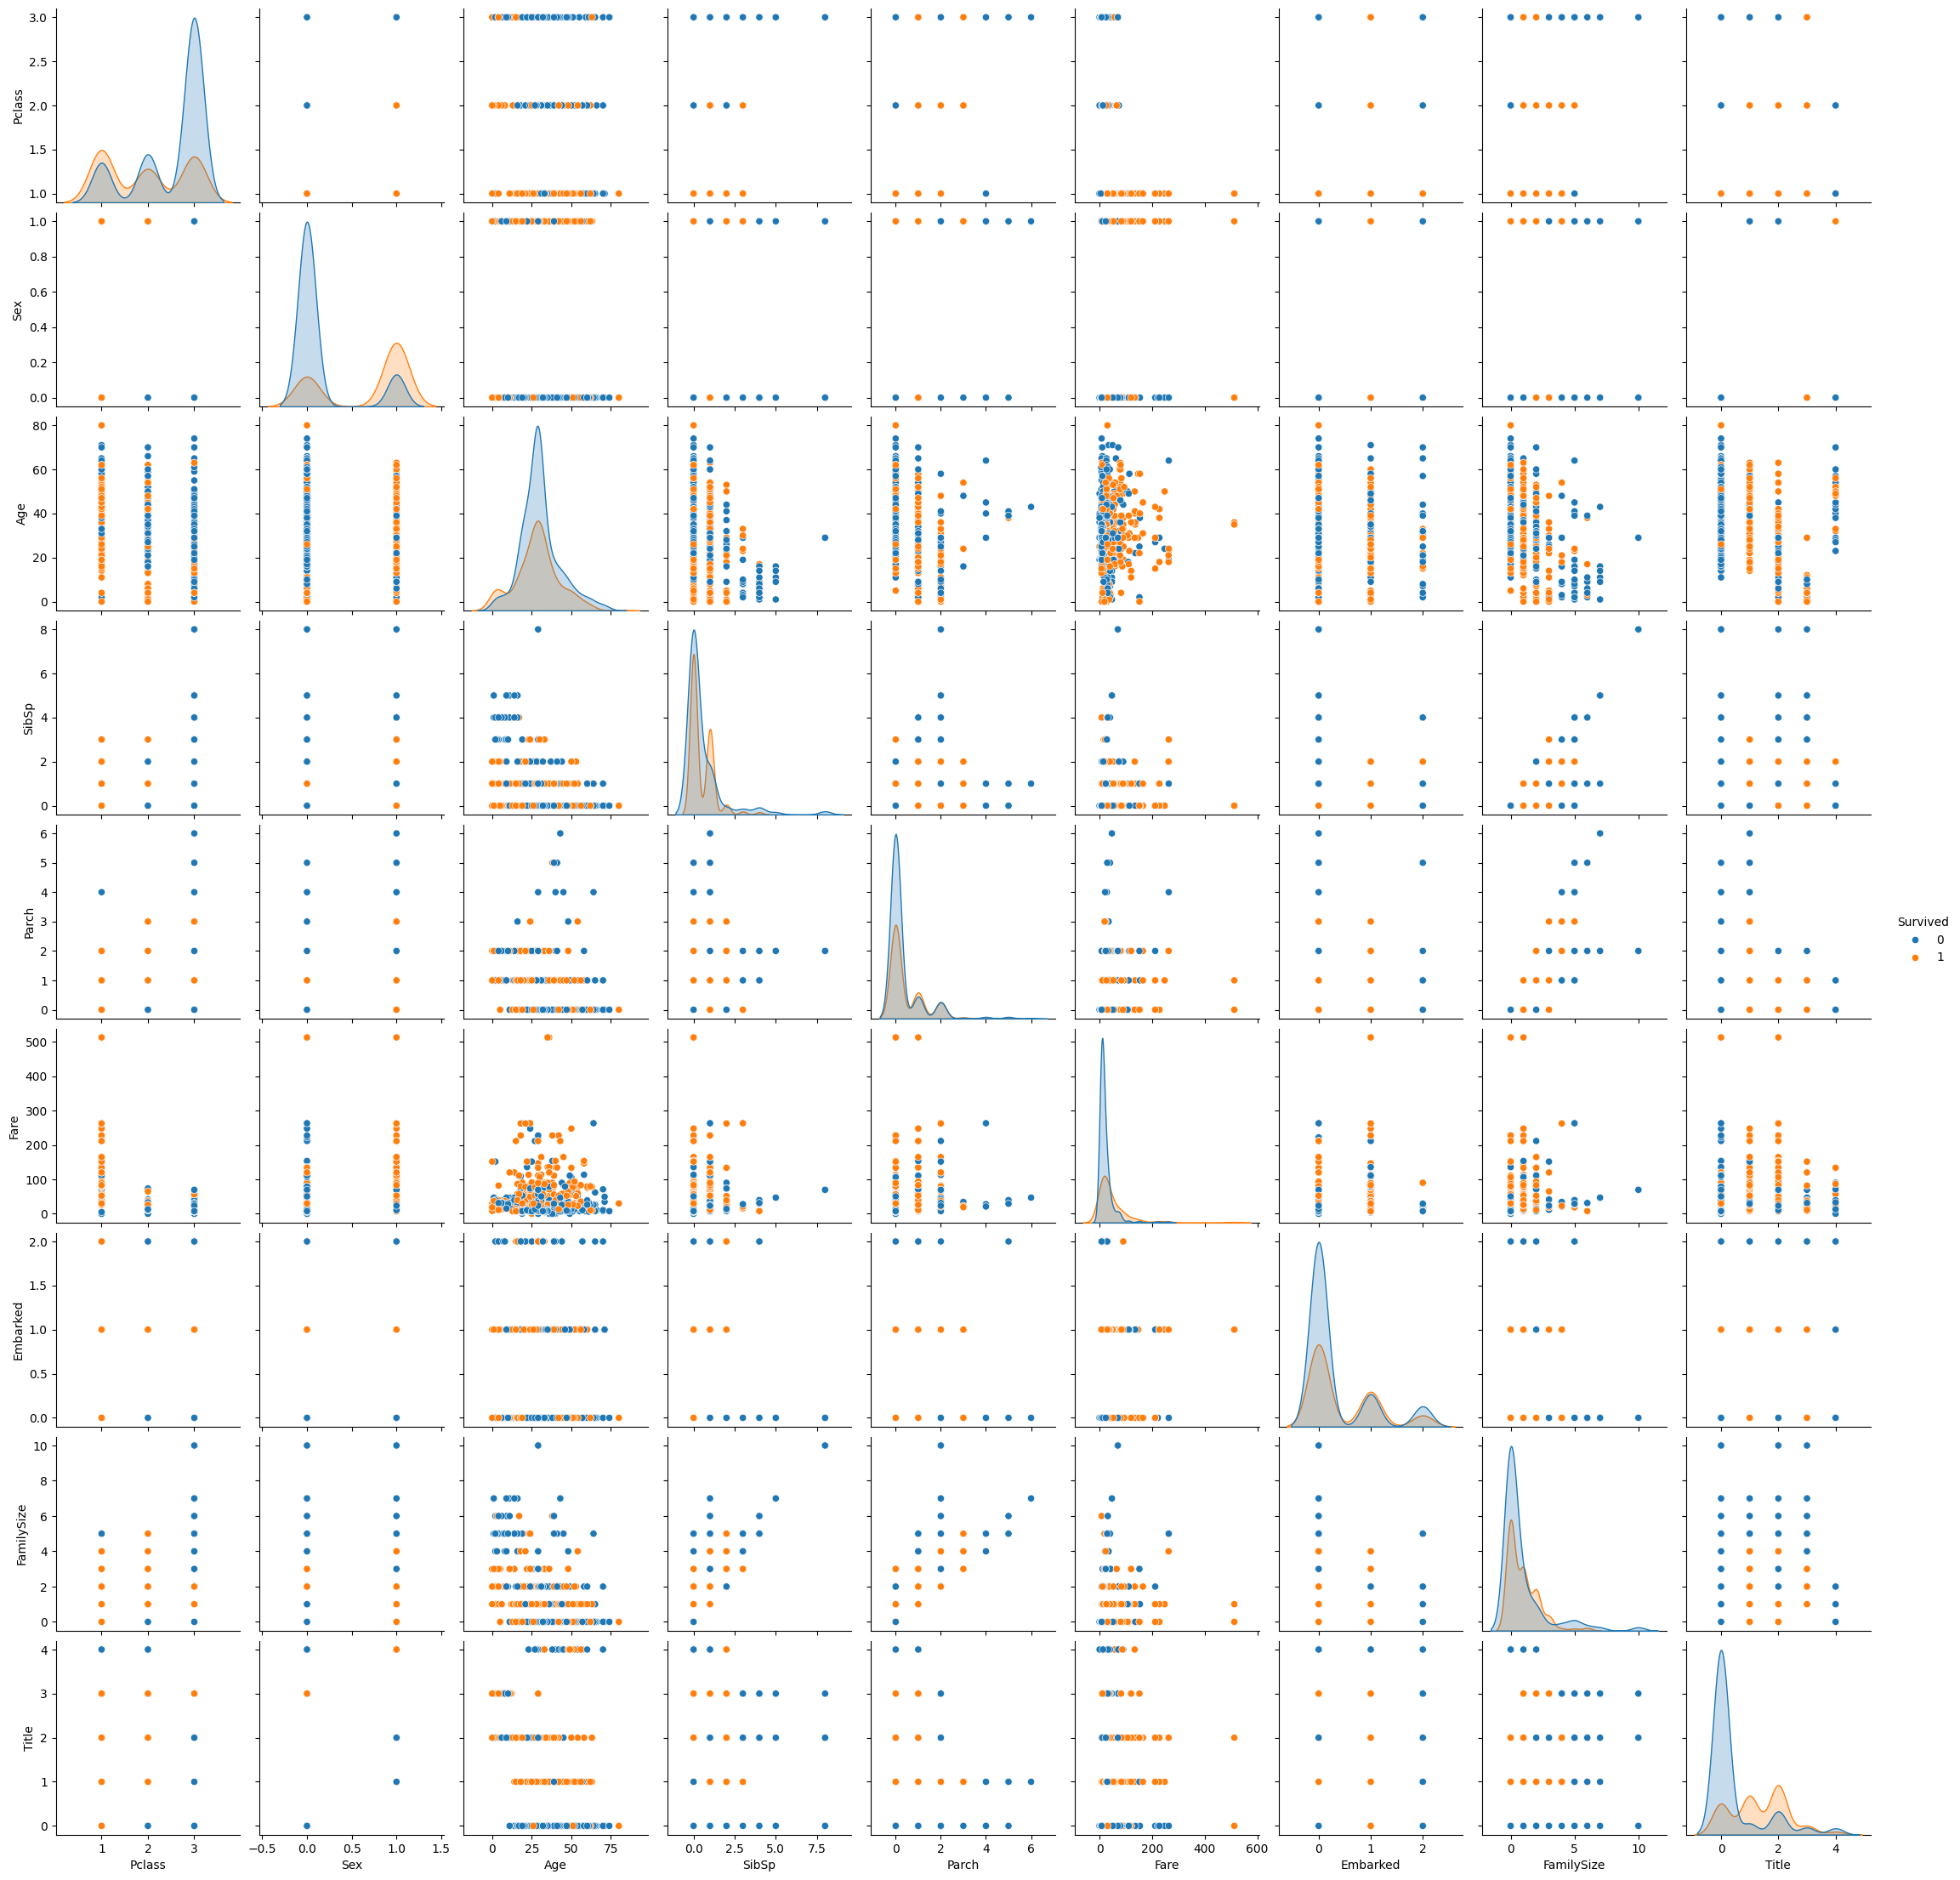

In [202]:
# Pairplot
sns.pairplot(titanic_data[features + ['Survived']], hue='Survived', diag_kind='kde')
plt.show()

# **MODELING**

In [196]:
# Separate categorical and non-categorical columns
categorical_df = titanic_data.select_dtypes(include=['object', 'category'])
non_categorical_df = titanic_data.select_dtypes(exclude=['object', 'category'])

In [169]:
categorical_df.head()

,Sex,Embarked,Title
0,male,S,Mr
1,female,C,Mrs
2,female,S,Miss
3,female,S,Mrs
4,male,S,Mr


**ENCODING**

In [197]:
titanic_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

In [198]:
# Convert 'Sex' and 'Embarked' to numerical values
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S':0,'C':1,'Q':2})
titanic_data['Title'] = titanic_data['Title'].map({'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Rare Title':4})

In [ ]:
titanic_data.drop()

In [199]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,1,0,3,0,22,1,0,7.2500,0,1,0
1,2,1,1,1,38,1,0,71.2833,1,1,1
2,3,1,3,1,26,0,0,7.9250,0,0,2
3,4,1,1,1,35,1,0,53.1000,0,1,1
4,5,0,3,0,35,0,0,8.0500,0,0,0


In [256]:
# Define features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title']
X = titanic_data[features]
y = titanic_data['Survived']  # Assuming 'Survived' is the target column

In [223]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,3,0,22,1,0,7.2500,0,1,0
1,1,1,38,1,0,71.2833,1,1,1
2,3,1,26,0,0,7.9250,0,0,2
3,1,1,35,1,0,53.1000,0,1,1
4,3,0,35,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
886,2,0,27,0,0,13.0000,0,0,4
887,1,1,19,0,0,30.0000,0,0,2
888,3,1,29,1,2,23.4500,0,3,2
889,1,0,26,0,0,30.0000,1,0,0


In [224]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [257]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((712, 9), (712,), (179, 9), (179,))

In [258]:
# Classification Algorithms

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Define and train models
models = {
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBClassifier': XGBClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]


    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0),name)

Accuracy: 76.54% GaussianNB
Accuracy: 78.77% LogisticRegression
Accuracy: 74.30% KNN
Accuracy: 78.77% DecisionTree
Accuracy: 83.80% RandomForest
Accuracy: 81.01% GradientBoosting
Accuracy: 83.80% XGBClassifier


In [259]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
331,1,0,45,0,0,28.5000,0,0,0
733,2,0,23,0,0,13.0000,0,0,0
382,3,0,32,0,0,7.9250,0,0,0
704,3,0,26,1,0,7.8542,0,1,0
813,3,1,6,4,2,31.2750,0,6,2
...,...,...,...,...,...,...,...,...,...
106,3,1,21,0,0,7.6500,0,0,2
270,1,0,29,0,0,31.0000,0,0,0
860,3,0,41,2,0,14.1083,0,2,0
435,1,1,14,1,2,120.0000,0,3,2


In [260]:
# Scaling and Transforming Columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = X_train.select_dtypes(include=["int64","float64"]).columns

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, num_cols),
    ])


In [237]:
num_cols

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'Title'],
      dtype='object')

In [238]:
preprocessor

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'Title'],
      dtype='object'))])

Accuracy: 76.54%

Confusion Matrix:



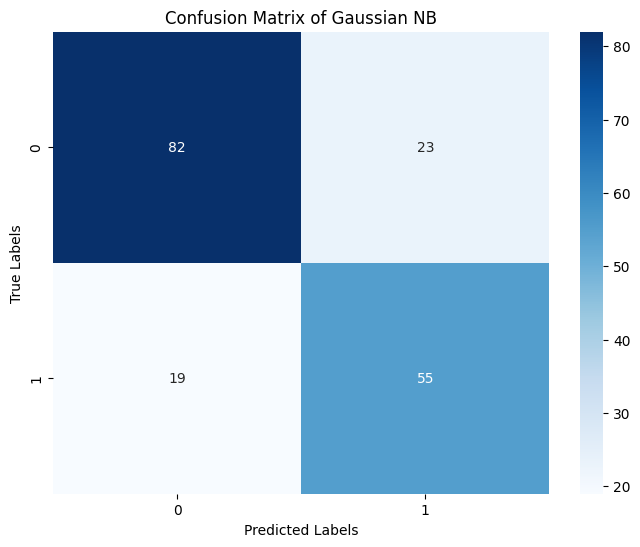


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       105
           1       0.71      0.74      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [261]:
from sklearn.pipeline import Pipeline
# Creating Pipeline for Gaussian NB
model1 = Pipeline([
    ('preprocessor', preprocessor),
    ('Gaussian NB', GaussianNB())
    ])

# Train the model
model1.fit(X_train, y_train)

# Make predictions
y_pred = model1.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Gaussian NB")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(f'\nClassification Report:\n{report}')

Accuracy: 78.77%

Confusion Matrix:



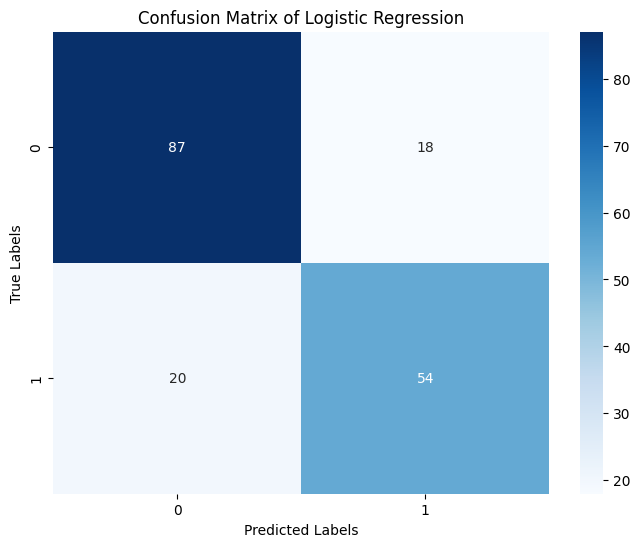


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [262]:
from sklearn.pipeline import Pipeline
# Creating Pipeline for Logistic Regression
model2 = Pipeline([
    ('preprocessor', preprocessor),
    ('Logistic Regression', LogisticRegression())
    ])

# Train the model
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(f'\nClassification Report:\n{report}')


Accuracy: 82.12%

Confusion Matrix:



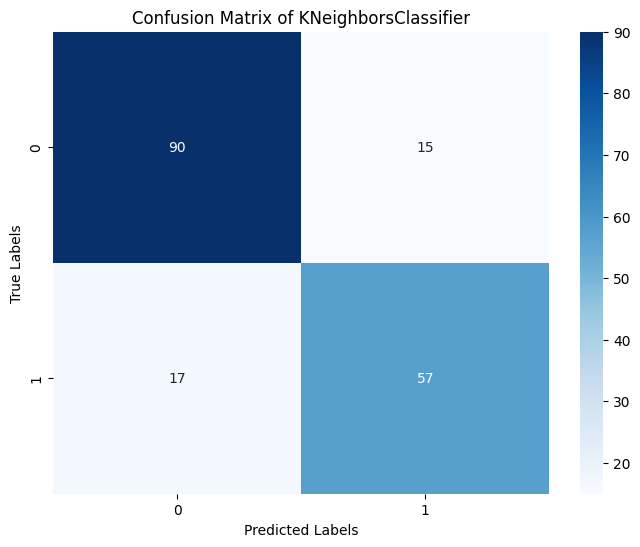


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [241]:
from sklearn.pipeline import Pipeline
# Creating Pipeline for KNeighborsClassifier
model3 = Pipeline([
    ('preprocessor', preprocessor),
    ('KNeighborsClassifier', KNeighborsClassifier())
    ])

# Train the model
model3.fit(X_train, y_train)

# Make predictions
y_pred = model3.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of KNeighborsClassifier")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(f'\nClassification Report:\n{report}')

Accuracy: 78.21%

Confusion Matrix:



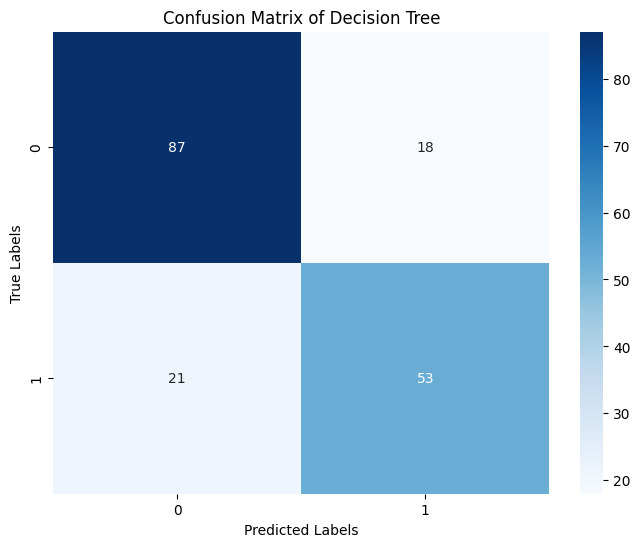


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [242]:
# Creating Pipeline for Decision Tree
model4 = Pipeline([
    ('preprocessor', preprocessor),
    ('Decision Tree', DecisionTreeClassifier())
    ])

# Train the model
model4.fit(X_train, y_train)

# Make predictions
y_pred = model4.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Decision Tree")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(f'\nClassification Report:\n{report}')

Accuracy: 84.36%

Confusion Matrix:



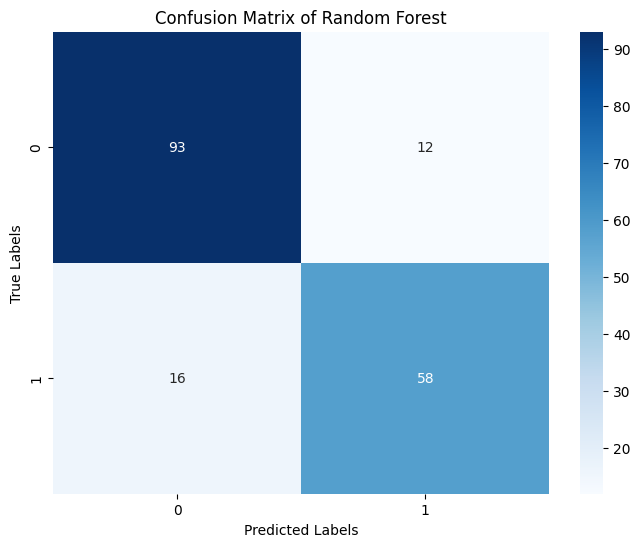


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



In [243]:
from sklearn.pipeline import Pipeline
# Creating Pipeline for Random forest
model5 = Pipeline([
    ('preprocessor', preprocessor),
    ('Random Forest', RandomForestClassifier())
    ])

# Train the model
model5.fit(X_train, y_train)

# Make predictions
y_pred = model5.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Random Forest")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(f'\nClassification Report:\n{report}')

Accuracy: 81.01%

Confusion Matrix:



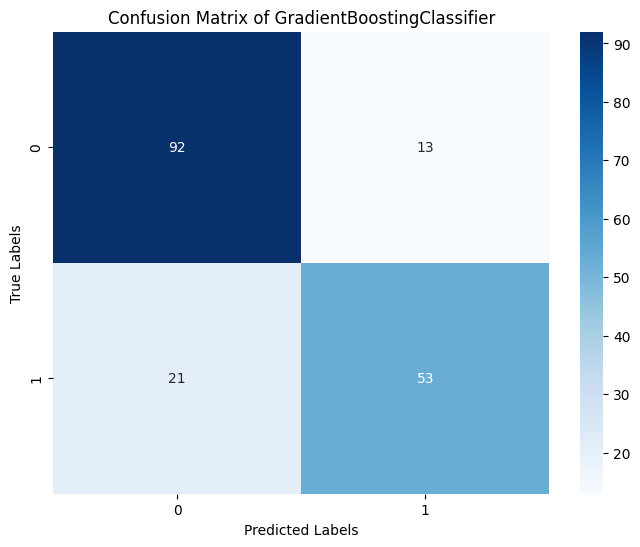


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [244]:
from sklearn.pipeline import Pipeline
# Creating Pipeline for GradientBoostingClassifier
model6 = Pipeline([
    ('preprocessor', preprocessor),
    ('GradientBoostingClassifier', GradientBoostingClassifier())
    ])

# Train the model
model6.fit(X_train, y_train)

# Make predictions
y_pred = model6.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of GradientBoostingClassifier")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(f'\nClassification Report:\n{report}')

Accuracy: 83.80%

Confusion Matrix:



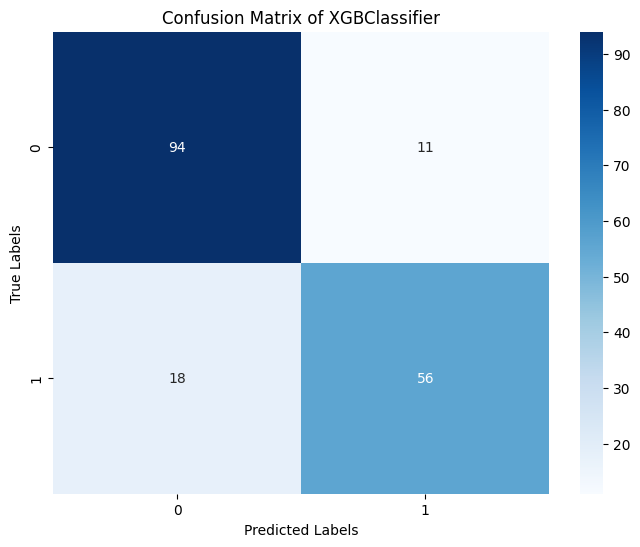


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [245]:
from sklearn.pipeline import Pipeline
# Creating Pipeline for XGBClassifier
model7 = Pipeline([
    ('preprocessor', preprocessor),
    ('XGBClassifier', XGBClassifier())
    ])

# Train the model
model7.fit(X_train, y_train)

# Make predictions
y_pred = model7.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of XGBClassifier")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(f'\nClassification Report:\n{report}')